In [150]:
#import libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import pyplot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
import math
from astropy.table import Table
from sklearn.metrics import confusion_matrix

In [151]:
#read data

api_df = pd.read_csv('C:/Users/jeffr/Documents/MTA Info/mta_311_12_26_14_dummies.csv',low_memory=False)

In [152]:
#check dataframe

api_df.head()

,latitude,longitude,late,created_date_day_of_week,agency_DFTA,agency_DHS,agency_DOE,agency_DOF,agency_DOHMH,agency_DOITT,...,Complaint Grouping_Noise,Complaint Grouping_Plants,Complaint Grouping_Traffic,Complaint Grouping_Water,open_data_channel_type_MOBILE,open_data_channel_type_ONLINE,open_data_channel_type_PHONE,Location_Type_Grouping_Business,Location_Type_Grouping_Public,Location_Type_Grouping_Residential
0,40.734426,-73.987714,False,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
1,40.718309,-73.985476,False,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,40.861550,-73.926897,False,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
3,40.721488,-73.995115,False,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
4,40.620056,-73.940781,False,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0


In [153]:
#convert to boolean

api_df['late'] =api_df['late']*1

In [154]:
#check new column

api_df['late'].describe()

count    15800.000000
mean         0.140570
std          0.347588
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: late, dtype: float64

In [155]:
#Set target variable

y = api_df.pop('late')

In [156]:
#Set features

X = api_df

In [157]:
#split dataset into train and test sets

X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = .5, random_state = 2)

In [158]:
#Verify shapes

print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (7900, 33)
Training Labels Shape: (7900,)
Testing Features Shape: (7900, 33)
Testing Labels Shape: (7900,)


In [159]:
#define regressor

random_forest = RandomForestRegressor()

In [160]:
#fit model

random_forest.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [161]:
#Score of model

random_forest.score(X_test,y_test)

0.14334279168987

In [162]:
#predictions

predictions = random_forest.predict(X_test)

In [163]:
#errors

errors = abs(predictions - y_test)

In [164]:
print('Metrics for Random Forest Trained on Training Data')
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')

Metrics for Random Forest Trained on Training Data
Average absolute error: 0.18 degrees.


In [165]:
#examine features

RF_features = random_forest.feature_importances_

In [166]:
#indices of RF

RF_indices = np.argsort(RF_features)[::-1]

In [167]:
#names of columns

RF_names = X_test.columns

In [168]:
#Coefficients of features ranked by importance

RF_names[RF_indices][:10]
RF_features[RF_indices][:10]

array([0.33001414, 0.31142172, 0.10650221, 0.06056669, 0.0387477 ,
       0.02681137, 0.01272474, 0.01272022, 0.01085496, 0.01072028])

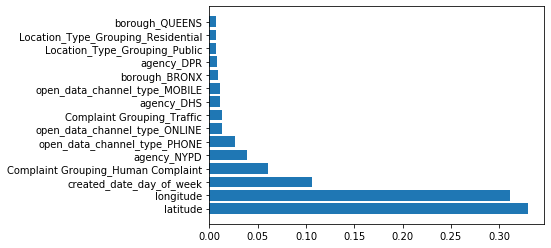

In [169]:
#look at graph of features by importance

plt.barh(RF_names[RF_indices][:15],RF_features[RF_indices][:15]);

In [170]:
#Recursive Feature Elimination for Logistic Regression Model

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs')
rfe = RFE(logreg, 20)
rfe = rfe.fit(X,y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

[False False False  True  True  True False  True  True  True False  True
  True  True  True  True  True False  True  True False  True  True  True
  True False  True False False False  True False False]
[13 14 11  1  1  1  3  1  1  1  4  1  1  1  1  1  1  5  1  1  2  1  1  1
  1  8  1  7 10  9  1  6 12]


In [171]:
X.columns

Index(['latitude', 'longitude', 'created_date_day_of_week', 'agency_DFTA',
       'agency_DHS', 'agency_DOE', 'agency_DOF', 'agency_DOHMH',
       'agency_DOITT', 'agency_DOT', 'agency_DPR', 'agency_EDC', 'agency_NYPD',
       'agency_TLC', 'borough_BRONX', 'borough_BROOKLYN', 'borough_MANHATTAN',
       'borough_QUEENS', 'borough_STATEN ISLAND', 'Complaint Grouping_Animal',
       'Complaint Grouping_Cleaning', 'Complaint Grouping_Human Complaint',
       'Complaint Grouping_Maintenance', 'Complaint Grouping_Noise',
       'Complaint Grouping_Plants', 'Complaint Grouping_Traffic',
       'Complaint Grouping_Water', 'open_data_channel_type_MOBILE',
       'open_data_channel_type_ONLINE', 'open_data_channel_type_PHONE',
       'Location_Type_Grouping_Business', 'Location_Type_Grouping_Public',
       'Location_Type_Grouping_Residential'],
      dtype='object')

In [172]:
cols=['agency_DFTA','agency_DHS', 'agency_DOE',
       'agency_DOHMH', 'agency_DOITT', 'agency_DOT', 'agency_EDC',
       'agency_NYPD', 'agency_TLC','borough_BRONX', 'borough_BROOKLYN',
       'borough_MANHATTAN', 'borough_STATEN ISLAND', 'Complaint Grouping_Animal',
       'Complaint Grouping_Human Complaint', 'Complaint Grouping_Maintenance','Complaint Grouping_Noise',
       'Complaint Grouping_Plants','Complaint Grouping_Water',  'Location_Type_Grouping_Business']

In [173]:
#Features selected by RFE
X=api_df[cols]

In [174]:
#split again into training and test set due to changed columns and then fit

logreg = LogisticRegression()
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = .5, random_state = 2)
result=logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [175]:
#Accuracy

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.87


In [176]:
#Confusion Matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6726   56]
 [ 989  129]]


In [177]:
#Evaluation of model performance

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      6782
           1       0.70      0.12      0.20      1118

    accuracy                           0.87      7900
   macro avg       0.78      0.55      0.56      7900
weighted avg       0.85      0.87      0.82      7900



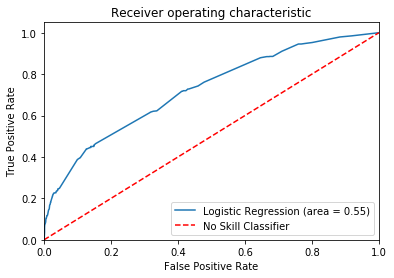

In [178]:
#AUC-ROC curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--', label='No Skill Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
#Graph labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [179]:
#Precision Recall curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
print(precision, recall)

[0.14151899 0.6972973  1.        ] [1.         0.11538462 0.        ]


In [180]:
#F1 score

f1 = f1_score(y_test, y_pred)
print(f1)

0.19800460475825019


In [181]:
#precision-recall AUC

auc = auc(recall, precision)
print(auc)

0.4689358930498171


Logistic: f1=0.198 auc=0.469


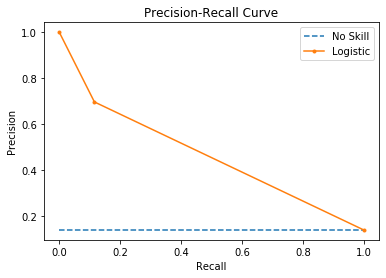

In [183]:
# precision-recall curve and f1
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

# predict class values
yhat = logreg.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
#graph labels
plt.title('Precision-Recall Curve')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
pyplot.show()

In [184]:
#Coeffcieints of features

coefficients=(logreg.coef_[0])
print(coefficients)

[-0.48905014  0.79052143  0.77711627 -0.61241819 -0.19761927 -1.14943405
  1.66697279 -0.85402289  2.13875881  0.6556385  -0.41158132 -0.30382587
  0.47635461 -0.25090889  0.99122429 -0.43408247 -0.74713927  0.36150004
  0.31667372  0.70357439]


In [185]:
#Odds Ratio

odds=np.exp(logreg.coef_[0])
print(odds)

[0.61320858 2.20454563 2.17519055 0.54203853 0.82068225 0.31681602
 5.29611105 0.42569894 8.48889475 1.92637211 0.66260164 0.73798936
 1.61019391 0.77809326 2.69453133 0.64785883 0.4737198  1.43548108
 1.37255466 2.02096353]


In [186]:
#Features of columns

features=X.columns
features

Index(['agency_DFTA', 'agency_DHS', 'agency_DOE', 'agency_DOHMH',
       'agency_DOITT', 'agency_DOT', 'agency_EDC', 'agency_NYPD', 'agency_TLC',
       'borough_BRONX', 'borough_BROOKLYN', 'borough_MANHATTAN',
       'borough_STATEN ISLAND', 'Complaint Grouping_Animal',
       'Complaint Grouping_Human Complaint', 'Complaint Grouping_Maintenance',
       'Complaint Grouping_Noise', 'Complaint Grouping_Plants',
       'Complaint Grouping_Water', 'Location_Type_Grouping_Business'],
      dtype='object')

In [189]:
#Create table of features, coeffcients, and odds ratios

t=Table([features,coefficients, odds], names= ('features', 'coefficients','odds ratio'))
t

features,coefficients,odds ratio
object,float64,float64
agency_DFTA,-0.4890501427947647,0.6132085782311333
agency_DHS,0.7905214250876688,2.204545632016986
agency_DOE,0.7771162692006365,2.175190548481822
agency_DOHMH,-0.6124181891947023,0.5420385312540468
agency_DOITT,-0.1976192736550583,0.8206822490184139
agency_DOT,-1.1494340475693037,0.3168160214476185
agency_EDC,1.6669727864811212,5.296111046878813
agency_NYPD,-0.8540228941578774,0.42569894085552573
agency_TLC,2.1387588088341096,8.488894746206027
